# Explore here

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

url = "https://raw.githubusercontent.com/4GeeksAcademy/logistic-regression-project-tutorial/main/bank-marketing-campaign-data.csv"

df = pd.read_csv(url, sep =';')
df.head()


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [34]:
df.shape

(41188, 21)

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [36]:
#busqueda de duplicados
df[df.duplicated()==True]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
1266,39,blue-collar,married,basic.6y,no,no,no,telephone,may,thu,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
12261,36,retired,married,unknown,no,no,no,telephone,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.966,5228.1,no
14234,27,technician,single,professional.course,no,no,no,cellular,jul,mon,...,2,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
16956,47,technician,divorced,high.school,no,yes,no,cellular,jul,thu,...,3,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
18465,32,technician,single,professional.course,no,yes,no,cellular,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,no
20216,55,services,married,high.school,unknown,no,no,cellular,aug,mon,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,no
20534,41,technician,married,professional.course,no,yes,no,cellular,aug,tue,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no
25217,39,admin.,married,university.degree,no,no,no,cellular,nov,tue,...,2,999,0,nonexistent,-0.1,93.200,-42.0,4.153,5195.8,no
28477,24,services,single,high.school,no,yes,no,cellular,apr,tue,...,1,999,0,nonexistent,-1.8,93.075,-47.1,1.423,5099.1,no
32516,35,admin.,married,university.degree,no,yes,no,cellular,may,fri,...,4,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no


In [37]:
#eliminacion de duplicados
df.drop_duplicates(inplace=True, ignore_index=True)
df.shape

(41176, 21)

In [38]:
#eliminacion de columnas innecesarias
df.drop(["contact","month","day_of_week","duration","campaign","pdays","previous"],axis=1,inplace=True)
df.head()

,age,job,marital,education,default,housing,loan,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


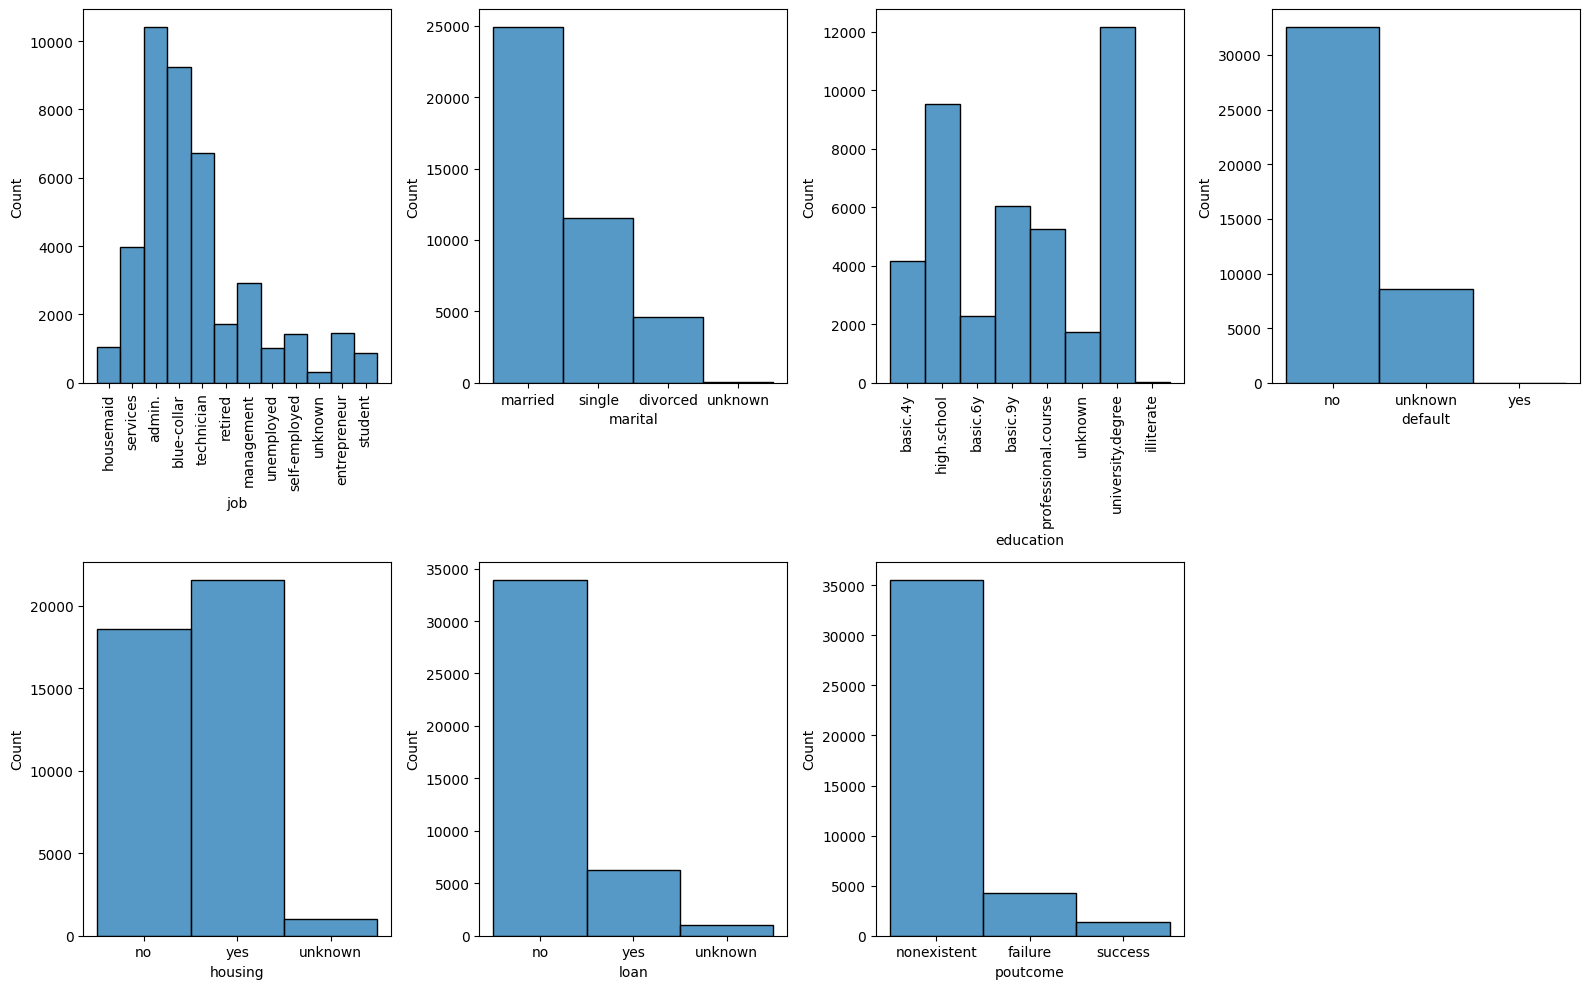

In [39]:
#visualizacion de datos categoricos
fig, axis = plt.subplots(2, 4, figsize=(16, 10))

sns.histplot(ax = axis[0,0], data = df, x = "job")
axis[0,0].tick_params(axis='x', rotation=90)
sns.histplot(ax = axis[0,1], data = df, x = "marital")
sns.histplot(ax = axis[0,2], data = df, x = "education")
axis[0,2].tick_params(axis='x', rotation=90)
sns.histplot(ax = axis[0,3], data = df, x = "default")
sns.histplot(ax = axis[1,0], data = df, x = "housing")
sns.histplot(ax = axis[1,1], data = df, x = "loan")
sns.histplot(ax = axis[1,2], data = df, x = "poutcome")
plt.delaxes(axis[1,3])

plt.tight_layout()
plt.show()

Observamos que:
    -la mayoria de las personas pertenecen a los sectores administrativo, obrero o tecnico
    -mas de la mitad de las personas estan casadas
    -algo mas de la mitad de las personas han teminado el instituto o tienen estudios universitarios
    -la mayoria no tiene credito
    -algo mas de la mitad de las personas tienen un prestamo hipotecario
    -la mayoria no tiene prestamo personal
    -la mayoria no fueron fueron candidatos en la campaña de marketing anterior

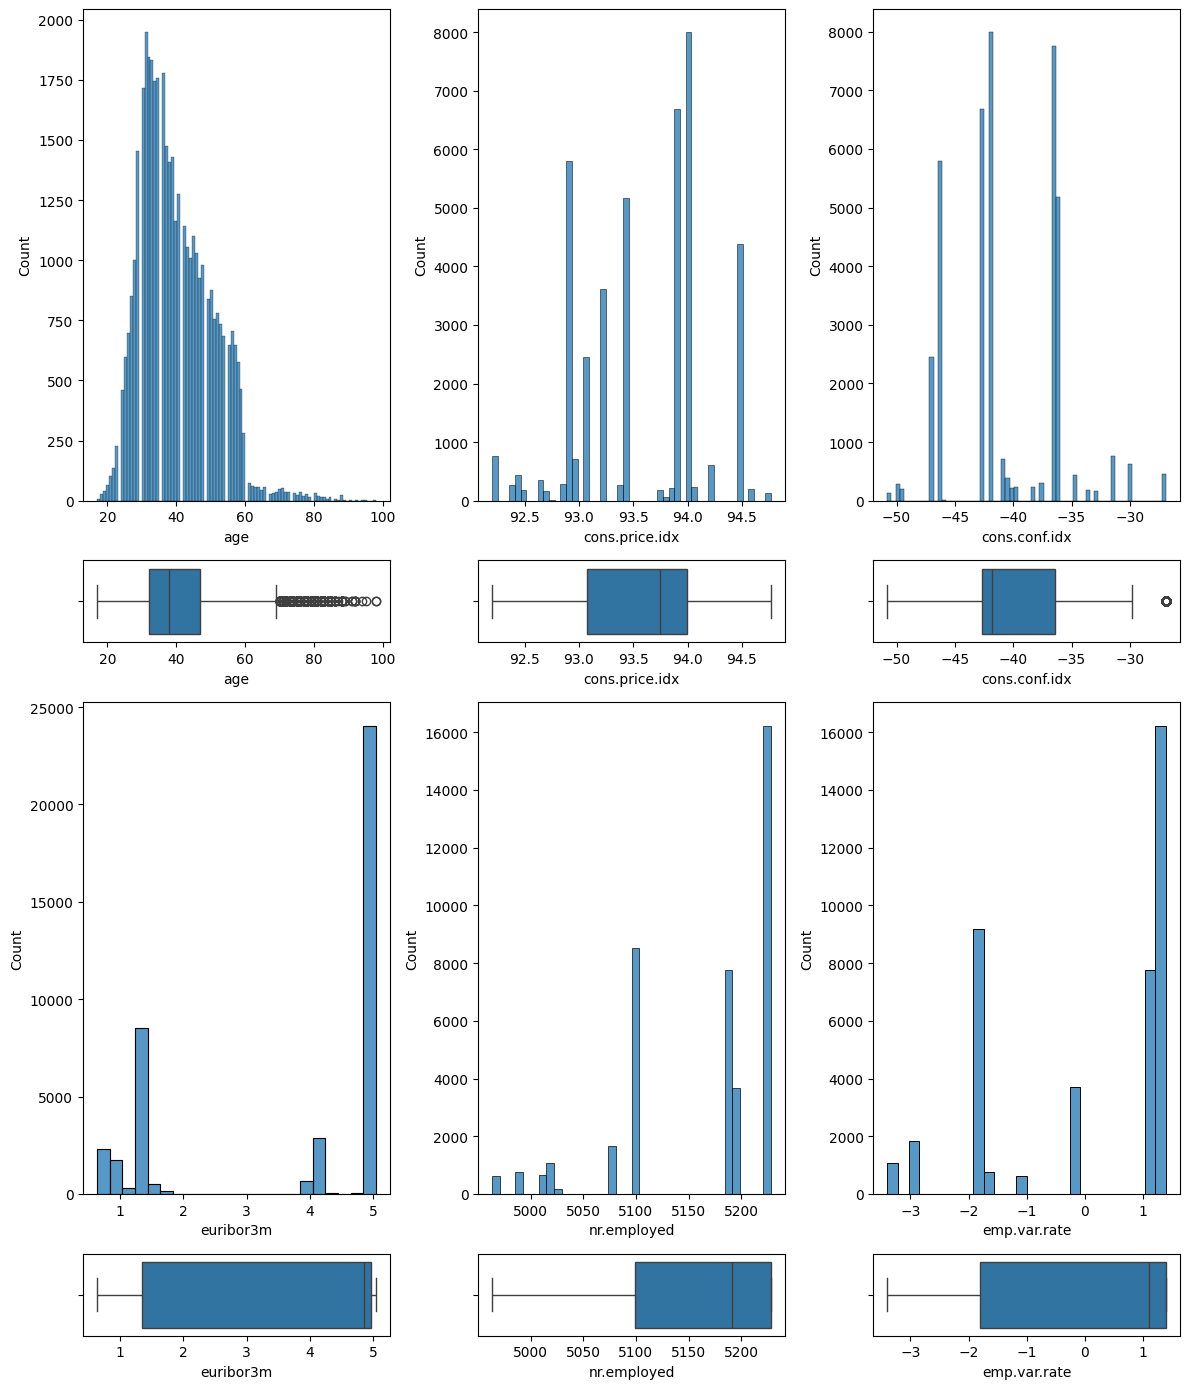

In [40]:
#visualizacion de datos numericos
fig, axis = plt.subplots(4, 3, figsize = (12, 14), gridspec_kw = {"height_ratios": [6, 1, 6, 1]})

sns.histplot(ax = axis[0, 0], data = df, x = "age")
sns.boxplot(ax = axis[1, 0], data = df, x = "age")

sns.histplot(ax = axis[0, 1], data = df, x = "cons.price.idx")
sns.boxplot(ax = axis[1, 1], data = df, x = "cons.price.idx")

sns.histplot(ax = axis[0, 2], data = df, x = "cons.conf.idx")
sns.boxplot(ax = axis[1, 2], data = df, x = "cons.conf.idx")

sns.histplot(ax = axis[2,0], data = df, x = "euribor3m")
sns.boxplot(ax = axis[3, 0], data = df, x = "euribor3m")

sns.histplot(ax = axis[2,1], data = df, x = "nr.employed")
sns.boxplot(ax = axis[3, 1], data = df, x = "nr.employed")

sns.histplot(ax = axis[2,2], data = df, x = "emp.var.rate")
sns.boxplot(ax = axis[3, 2], data = df, x = "emp.var.rate")

plt.tight_layout()
plt.show()

Observamos que:
    -la myoria de la gente tiene entre 25 y 60 años
    -los valores del euribor3m se concentran entorno a 1,2 y 4,9
    -la mayoria tiene 5100 empleados o mas

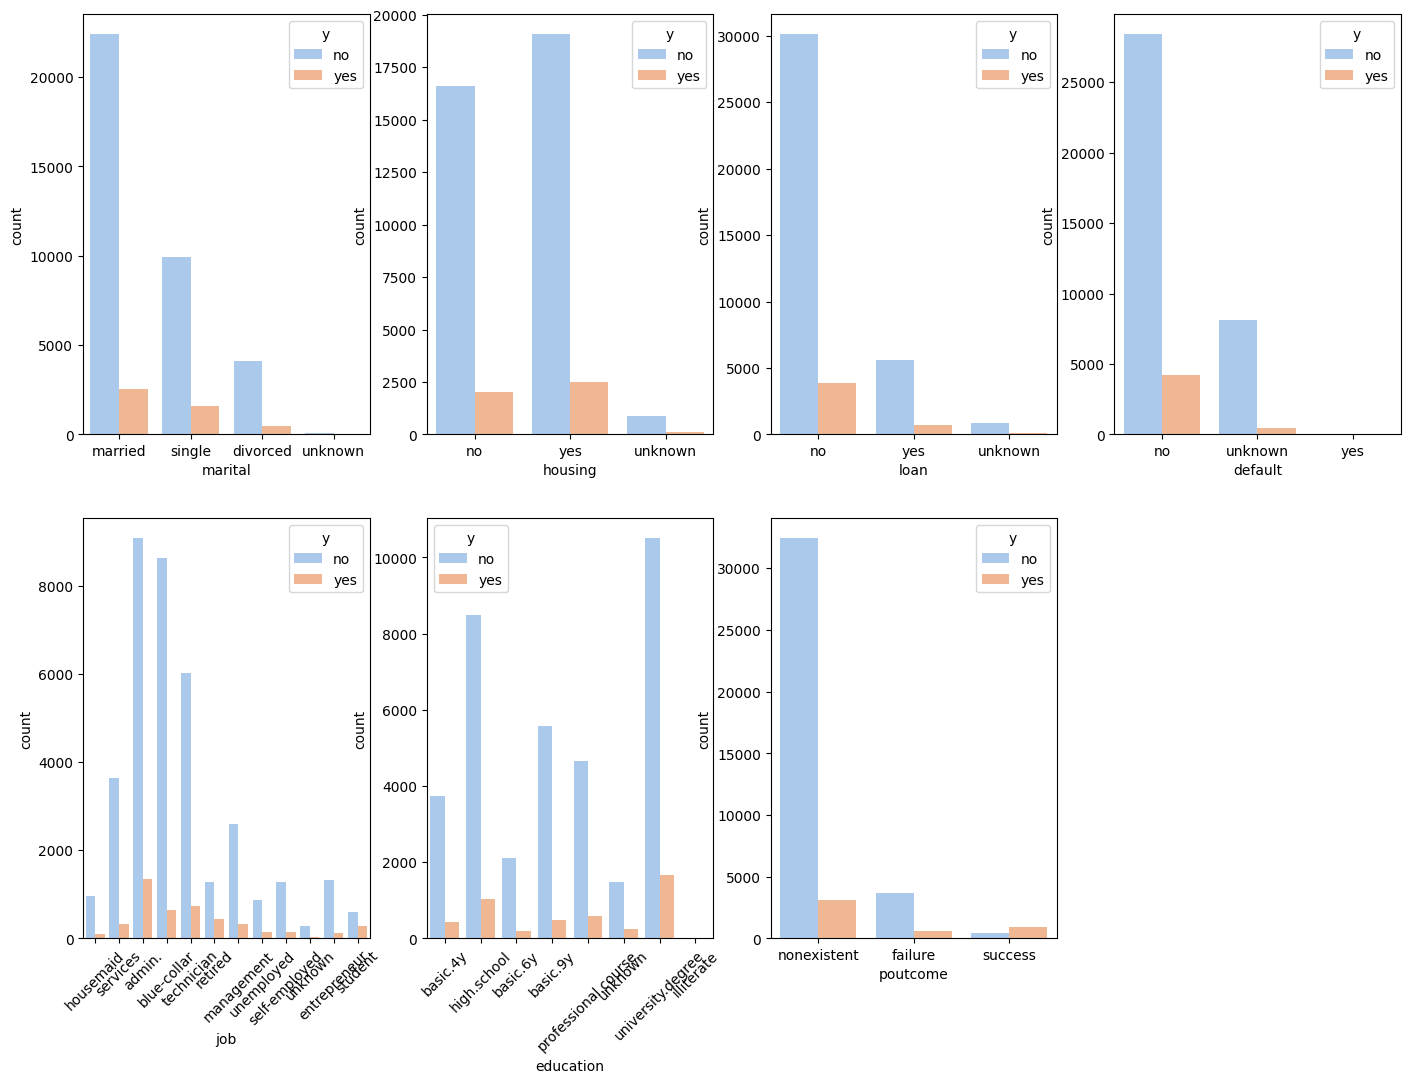

In [41]:
#relacion entre parametros categoricos
fig, axis = plt.subplots(2,4, figsize = (17, 12))

sns.countplot(ax=axis[0,0], data = df, x = "marital", palette="pastel", hue = 'y')
sns.countplot(ax=axis[0,1], data = df, x = "housing", palette="pastel", hue = 'y')
sns.countplot(ax=axis[0,2], data = df, x = "loan", palette="pastel", hue = 'y')
sns.countplot(ax=axis[0,3], data = df, x = "default", palette="pastel", hue = 'y')
sns.countplot(ax=axis[1,0], data = df, x = "job", palette="pastel", hue = 'y').tick_params(axis='x', rotation=45)
sns.countplot(ax=axis[1,1], data = df, x = "education", palette="pastel", hue = 'y').tick_params(axis='x', rotation=45)
sns.countplot(ax=axis[1,2], data = df, x = "poutcome", palette="pastel", hue = 'y')
plt.delaxes(axis[1,3])

plt.show()

No parece haber relacion entre las variables categoricas y que el cliente contrate o no un deposito a largo plazo. No obstante parece que si hay cierta relacion positiva entre el resultado de la campaña anterior y la decision del cliente de contratar el deposito, sin embargo son pocos los datos con esa caracteristica por lo que es dificil de asegurar.

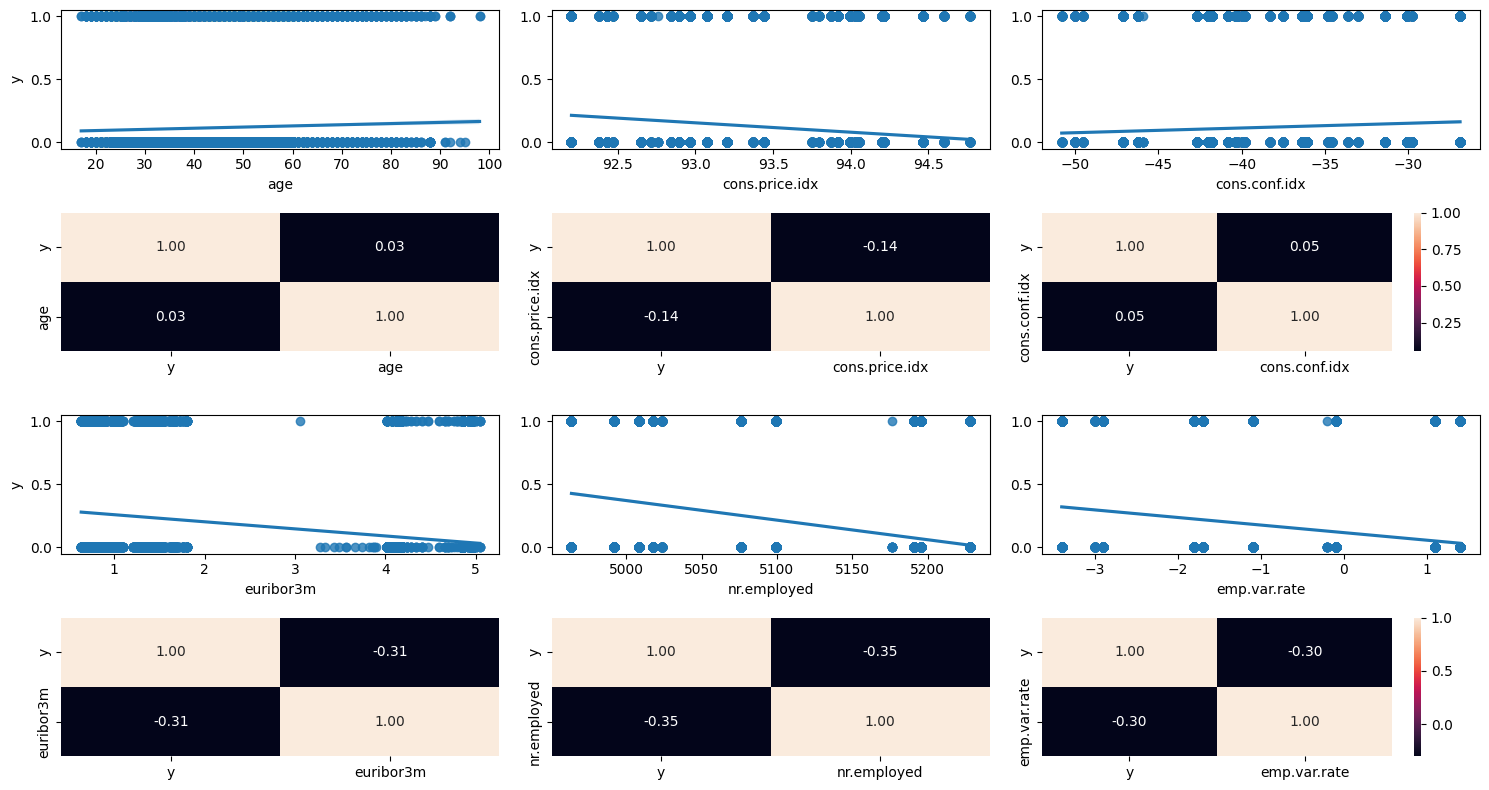

In [42]:
#relacion entre parametros numericos
df['y']= pd.factorize(df['y'])[0]
fig, axis = plt.subplots(4, 3, figsize = (15, 8))

sns.regplot(ax = axis[0, 0], data = df, x = "age", y = "y")
sns.heatmap(df[["y", "age"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 0], cbar = False)

sns.regplot(ax = axis[0, 1], data = df, x = "cons.price.idx", y = "y").set(ylabel = None)
sns.heatmap(df[["y", "cons.price.idx"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 1], cbar = False)

sns.regplot(ax = axis[0, 2], data = df, x = "cons.conf.idx", y = "y").set(ylabel = None)
sns.heatmap(df[["y", "cons.conf.idx"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 2])

sns.regplot(ax = axis[2, 0], data = df, x = "euribor3m", y = "y")
sns.heatmap(df[["y", "euribor3m"]].corr(), annot = True, fmt = ".2f", ax = axis[3, 0], cbar = False)

sns.regplot(ax = axis[2, 1], data = df, x = "nr.employed", y = "y").set(ylabel = None)
sns.heatmap(df[["y", "nr.employed"]].corr(), annot = True, fmt = ".2f", ax = axis[3, 1], cbar = False)

sns.regplot(ax = axis[2, 2], data = df, x = "emp.var.rate", y = "y").set(ylabel = None)
sns.heatmap(df[["y", "emp.var.rate"]].corr(), annot = True, fmt = ".2f", ax = axis[3, 2])

plt.tight_layout()
plt.show()

No se aprecia correlacion entre la decision de contratacion y la edad, el indice de precio al consumidor, y el indice de confianza al consumidor.
Aunque muy poca, podría haber cierta correlacion negativa entre la decision de contratacion y el euribor, el numero de empleados, y la tasa de variacion de empleo

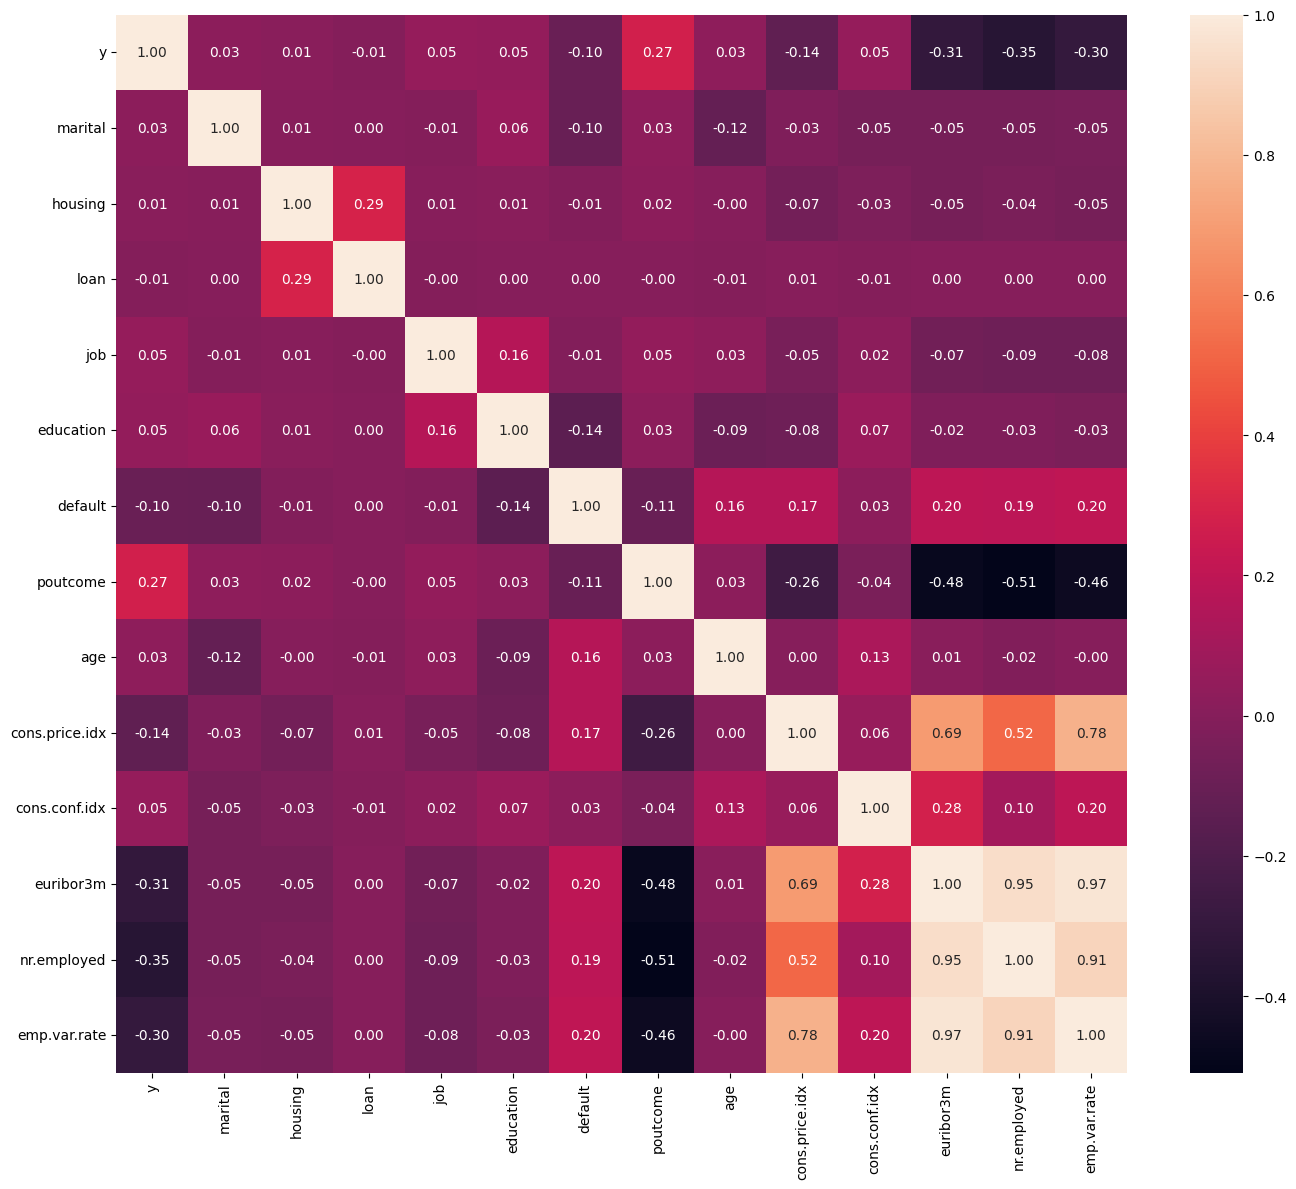

In [43]:
#correlacion entre parametros numericos-categoricos
df["marital"] = pd.factorize(df["marital"])[0]
df["housing"] = pd.factorize(df["housing"])[0]
df["loan"] = pd.factorize(df["loan"])[0]
df["job"] = pd.factorize(df["job"])[0]
df["education"] = pd.factorize(df["education"])[0]
df["default"] = pd.factorize(df["default"])[0]
df["poutcome"] = pd.factorize(df["poutcome"])[0]
df["y"] = pd.factorize(df["y"])[0]

fig, axes = plt.subplots(figsize=(14, 12))

sns.heatmap(df[["y", "marital", "housing", "loan", "job", "education", "default", "poutcome", "age", "cons.price.idx", "cons.conf.idx", "euribor3m", "nr.employed", "emp.var.rate"]].corr(), annot = True, fmt = ".2f")

plt.tight_layout()
plt.show()


Como se ha observado en los graficos anteriores, las variables con mayor correlacion con la decision de contratacion, si bien no muy altas, son: el poutcome, euribor3m, nr.employed, emp.var.rate

In [44]:
df.describe()

,age,job,marital,education,default,housing,loan,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
count,41176.00000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000
mean,40.02380,3.673863,0.510637,3.277370,0.208908,0.571959,0.199825,0.169953,0.081922,93.575720,-40.502863,3.621293,5167.034870,0.112663
std,10.42068,2.454340,0.696794,2.185558,0.406713,0.541216,0.456055,0.455811,1.570883,0.578839,4.627860,1.734437,72.251364,0.316184
min,17.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000
25%,32.00000,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,0.000000
50%,38.00000,3.000000,0.000000,3.000000,0.000000,1.000000,0.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,0.000000
75%,47.00000,4.000000,1.000000,6.000000,0.000000,1.000000,0.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.000000
max,98.00000,11.000000,3.000000,7.000000,2.000000,2.000000,2.000000,2.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,1.000000


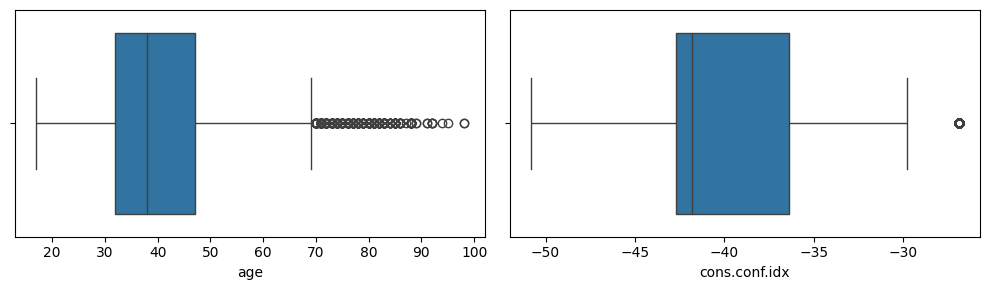

In [45]:
#busqueda y visualizacion de valores atipicos 
fig, axis = plt.subplots(1, 2, figsize = (10, 3))

sns.boxplot(ax = axis[0], data = df, x = "age")
sns.boxplot(ax = axis[1], data = df, x = "cons.conf.idx")

plt.tight_layout()
plt.show()

In [46]:
Q1 = df['age'].quantile(0.25)
Q3 = df['age'].quantile(0.75)
age_IQR = Q3 - Q1

upper_limit = Q3 + 1.5 * age_IQR
lower_limit = Q1 - 1.5 * age_IQR

print(f"Los límites superior e inferior para la búsqueda de valores atipicos son {round(upper_limit, 2)} y {round(lower_limit, 2)}, con un rango intercuartílico de {round(age_IQR, 2)}")

Los límites superior e inferior para la búsqueda de valores atipicos son 69.5 y 9.5, con un rango intercuartílico de 15.0


In [47]:
df[df['age']>70].shape

(421, 14)

In [48]:
Q1 = df['cons.conf.idx'].quantile(0.25)
Q3 = df['cons.conf.idx'].quantile(0.75)
cci_IQR = Q3 - Q1

upper_limit = Q3 + 1.5 * cci_IQR
lower_limit = Q1 - 1.5 * cci_IQR

print(f"Los límites superior e inferior para la búsqueda de valores atipicos son {round(upper_limit, 2)} y {round(lower_limit, 2)}, con un rango intercuartílico de {round(cci_IQR, 2)}")

Los límites superior e inferior para la búsqueda de valores atipicos son -26.95 y -52.15, con un rango intercuartílico de 6.3


In [49]:
df[df['cons.conf.idx']>-27].shape

(446, 14)

Si bien la edad muestra valores atipicos, no son valores irreales ya que estan en el rango de vida de las personas. Asi mismo, no son muchos valores atipicos, y al no ser una variable aparentemente correlacionada eliminarlos nos privaria de los valores de las variables relacionadas, interfiriendo asi con el aprendizaje.
Por otro lado, el indice de confianza del consumidor tambien presenta pocos valores atipicos. Y lo que es mas, es un unico valor atipico repetido, por lo que si bien es atipico en el conjunto de datos, parece un valor "tipico" de la variable. Al ser un unico valor repetido, considero mantenerlo en el conjunto de datos para ver como afecta al modelo

In [50]:
#conteo y reemplazo de valores nulos
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [51]:
#division de los datos en train y test
from sklearn.model_selection import train_test_split

X = df.drop("y", axis = 1)
y = df["y"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state = 42)

X_train.head()

,age,job,marital,education,default,housing,loan,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
31677,34,3,0,0,0,0,1,0,-1.8,92.893,-46.2,1.327,5099.1
5218,44,2,0,1,0,0,0,0,1.1,93.994,-36.4,4.857,5191.0
11749,41,4,0,1,0,0,0,0,1.4,94.465,-41.8,4.959,5228.1
18068,22,1,0,3,1,0,0,0,1.4,93.918,-42.7,4.963,5228.1
6892,34,3,0,3,0,0,1,0,1.1,93.994,-36.4,4.860,5191.0


In [65]:
#normalizacion de los datos
from sklearn.preprocessing import MinMaxScaler

columnas = ["age", "job", "marital", "education", "default", "housing", "loan", "poutcome", "emp.var.rate", "cons.price.idx", "cons.conf.idx", "euribor3m", "nr.employed"]
scaler = MinMaxScaler()
scaler.fit_transform(X_train[["poutcome", "emp.var.rate", "cons.price.idx", "euribor3m", "nr.employed"]])
joblib.dump(scaler, open("scaler.save", "wb"))

X_train_norm = scaler.fit_transform(X_train[columnas])
X_train_norm = pd.DataFrame(X_train_norm, index=X_train.index, columns=columnas)

X_test_norm = scaler.fit_transform(X_test[columnas])
X_test_norm = pd.DataFrame(X_test_norm, index=X_test.index, columns=columnas)

X_train_norm.head()

,age,job,marital,education,default,housing,loan,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
31677,0.209877,0.272727,0.0,0.000000,0.0,0.0,0.5,0.0,0.333333,0.269680,0.192469,0.157107,0.512287
5218,0.333333,0.181818,0.0,0.142857,0.0,0.0,0.0,0.0,0.937500,0.698753,0.602510,0.957379,0.859735
11749,0.296296,0.363636,0.0,0.142857,0.0,0.0,0.0,0.0,1.000000,0.882307,0.376569,0.980503,1.000000
18068,0.061728,0.090909,0.0,0.428571,0.5,0.0,0.0,0.0,1.000000,0.669135,0.338912,0.981410,1.000000
6892,0.209877,0.272727,0.0,0.428571,0.0,0.0,0.5,0.0,0.937500,0.698753,0.602510,0.958059,0.859735


In [53]:
#seleccion de los mejores parametros
from sklearn.feature_selection import f_classif, SelectKBest

selection_model = SelectKBest(score_func = f_classif, k = 5)

X_train_sel = pd.DataFrame(selection_model.fit_transform(X_train_norm,y_train), columns = X_train_norm.columns.values[selection_model.get_support()])
X_test_sel = pd.DataFrame(selection_model.fit_transform(X_test_norm,y_test), columns = X_test_norm.columns.values[selection_model.get_support()])

X_train_sel.head()

,poutcome,emp.var.rate,cons.price.idx,euribor3m,nr.employed
0,0.0,0.333333,0.269680,0.157107,0.512287
1,0.0,0.937500,0.698753,0.957379,0.859735
2,0.0,1.000000,0.882307,0.980503,1.000000
3,0.0,1.000000,0.669135,0.981410,1.000000
4,0.0,0.937500,0.698753,0.958059,0.859735


In [54]:
#regresion logistica
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train_sel, y_train)

LogisticRegression()

In [55]:
y_pred = model.predict(X_test_sel)
y_pred

array([0, 0, 0, ..., 0, 0, 0], shape=(6177,))

In [56]:
#precision del modelo
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.8907236522583779

In [57]:
#optimizando el modelo
from sklearn.model_selection import GridSearchCV

hyperparams = {
    "C": [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    "penalty": ["l1", "l2", "elasticnet", None],
    "solver": ["newton-cg", "lbfgs", "liblinear", "sag", "saga"]
}

grid = GridSearchCV(model, hyperparams, scoring = "accuracy", cv = 10)
grid

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2', 'elasticnet', None],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='accuracy')

In [58]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

grid.fit(X_train_sel, y_train)

print(f"Best hyperparameters: {grid.best_params_}")

Best hyperparameters: {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}


In [59]:
model = LogisticRegression(C = 0.1, penalty = "l2", solver = "newton-cg")
model.fit(X_train_sel, y_train)

LogisticRegression(C=0.1, solver='newton-cg')

In [60]:
y_pred = model.predict(X_test_sel)
y_pred

array([0, 0, 0, ..., 0, 0, 0], shape=(6177,))

In [61]:
accuracy_score(y_test, y_pred)

0.8915331066860935

In [62]:
dump(model, open("LogisticRegression_0.1_l2_newton-cg_42.sav", "wb"))

Render link: https://loic-regresion-logistica.onrender.com/